# Built by Lubula Paul Chikwekwe

In [12]:
# 1. Building Blocks: Neurons
# 2. Combining Neurons into a Neural Network
# 3. Mean squared Error Loss (MSE) Example
# 4. Complete Neural Network built (Not optimized!!! Please understand)

In [1]:
# 1. Building Blocks: Neurons
# First, we have to talk about neurons, the basic unit of a neural network.

In [2]:
# A neuron takes inputs, does some "maths" with them, and produces one output.
# A. First, each input is multiplied by a weight
# B. All the weighted inputs are added together with a bias
# B. The sum is passed through an activation function (function used to turn an unbounded input into an output that has a nice, predictable form.)
# y = f((x1 ∗w1) + (x2 ∗w2) +b)

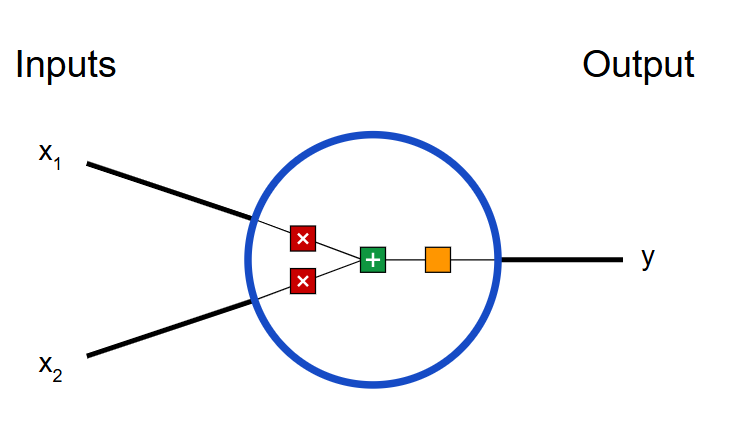

In [3]:
# A commonly used activation function is the sigmoid function (Image below)
# The sigmoid function only outputs numbers in the range (0, 1)
# You can think of it as compressing (−∞,+∞) to (0,1)

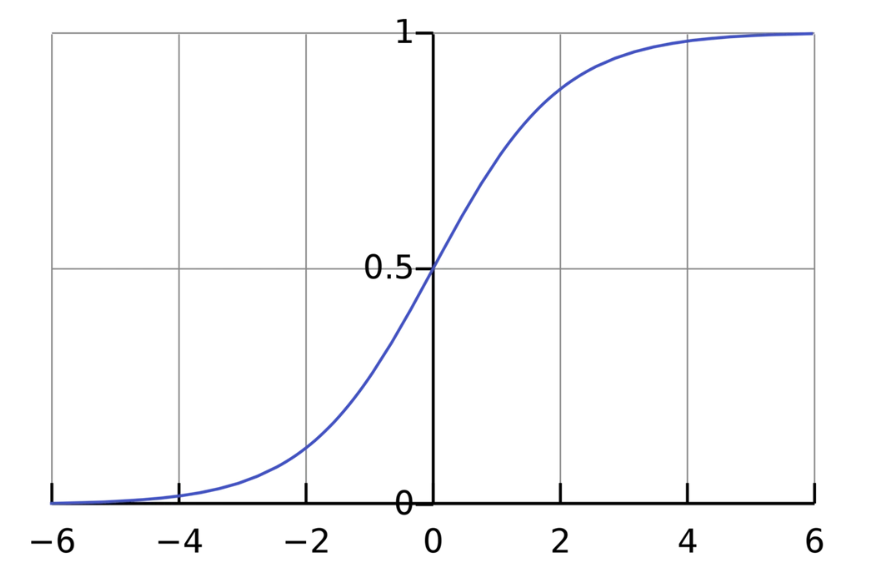

In [5]:
import numpy as np

def sigmoid(x):
  # Our activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    # Weight inputs, add bias, then use the activation function
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total)

weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # b = 4
n = Neuron(weights, bias)

x = np.array([2, 3])       # x1 = 2, x2 = 3
print(n.feedforward(x))

0.9990889488055994


In [6]:
# 2. Combining Neurons into a Neural Network
# A neural network is nothing more than a bunch of neurons connected together.
# Here’s what a simple neural network might look like:

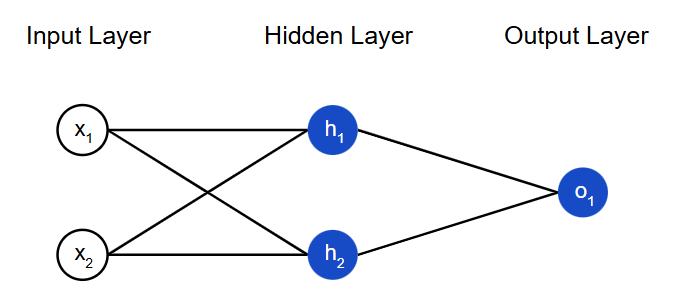

In [7]:
# This network has 2 inputs (x1 & x2),
# A hidden layer with 2 neurons (h1 & h1)
# An output layer with 1 neuron (o1).
# Notice that the inputs for 01 are the outputs from (h1 & h1)

In [8]:
# import numpy as np (dont need to import again)

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
  Each neuron has the same weights and bias:
    - w = [0, 1]
    - b = 0
  '''
  def __init__(self):
    weights = np.array([0, 1])
    bias = 0

    # The Neuron class here is from the previous section (if anyone following alone)
    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)

  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    # The inputs for o1 are the outputs from h1 and h2
    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

    return out_o1

network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x))

0.7216325609518421


In [10]:
# 3. Mean squared Error Loss (MSE)
# Here’s some code to calculate loss for us:

# import numpy as np (dont need to import again)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

y_true = np.array([1, 0, 0, 1])
y_pred = np.array([0, 0, 0, 0])

print(mse_loss(y_true, y_pred))

0.5


In [14]:
# 4. A Complete Neural Network
# Important to understand standardization or is it normaization? try research this on please

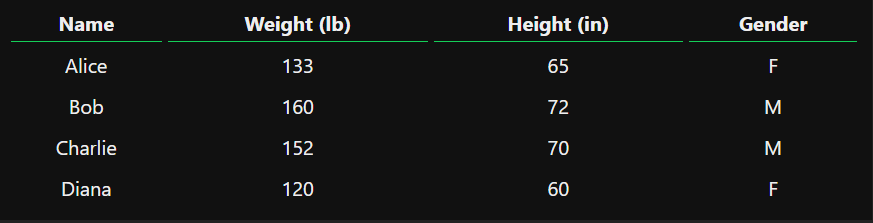

In [15]:
# We’ll represent Male with 0 and Female with a 1, and we’ll also shift the data to make it easier to use:

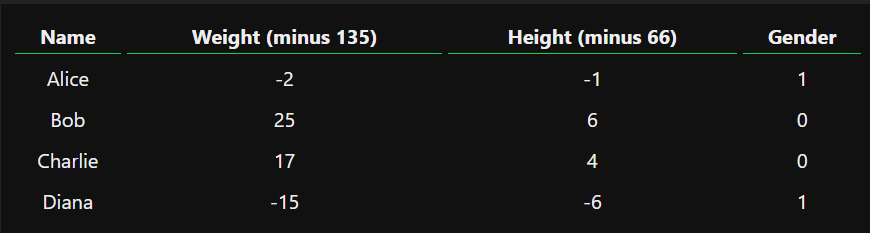

In [17]:
# Neural Network Visuals

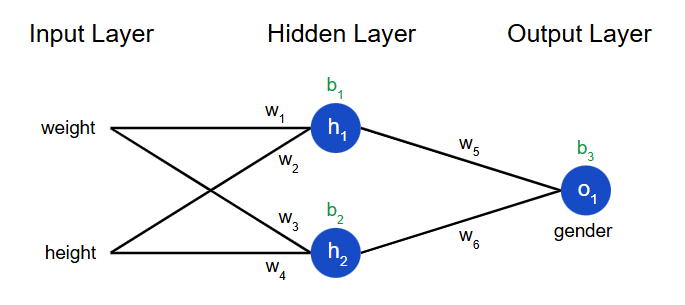

In [18]:
import numpy as np

def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

In [19]:
# Please dont get initimated by the code

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)

  *** DISCLAIMER ***:
  The code below is intended to be simple and educational, NOT optimal.
  Real neural net code looks nothing like this. DO NOT use this code.
  Instead, read/run it to understand how this specific network works.
  '''
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1 # normally choosen, industry standard
    epochs = 1000 # number of times to loop through the entire dataset

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        print("Epoch %d loss: %.3f" % (epoch, loss))

In [20]:
# Define dataset, check Image below
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])
all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

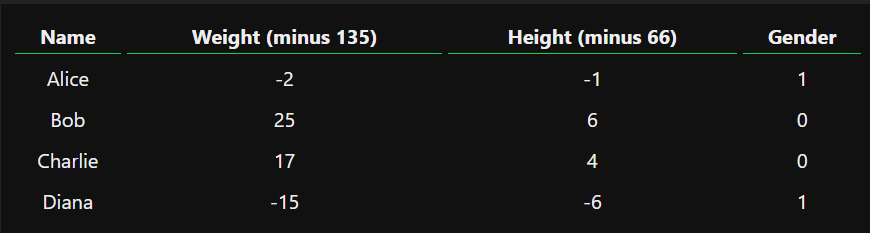

In [21]:
# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

Epoch 0 loss: 0.367
Epoch 10 loss: 0.173
Epoch 20 loss: 0.073
Epoch 30 loss: 0.051
Epoch 40 loss: 0.042
Epoch 50 loss: 0.037
Epoch 60 loss: 0.033
Epoch 70 loss: 0.029
Epoch 80 loss: 0.026
Epoch 90 loss: 0.024
Epoch 100 loss: 0.022
Epoch 110 loss: 0.020
Epoch 120 loss: 0.019
Epoch 130 loss: 0.018
Epoch 140 loss: 0.016
Epoch 150 loss: 0.015
Epoch 160 loss: 0.015
Epoch 170 loss: 0.014
Epoch 180 loss: 0.013
Epoch 190 loss: 0.012
Epoch 200 loss: 0.012
Epoch 210 loss: 0.011
Epoch 220 loss: 0.011
Epoch 230 loss: 0.010
Epoch 240 loss: 0.010
Epoch 250 loss: 0.009
Epoch 260 loss: 0.009
Epoch 270 loss: 0.009
Epoch 280 loss: 0.008
Epoch 290 loss: 0.008
Epoch 300 loss: 0.008
Epoch 310 loss: 0.008
Epoch 320 loss: 0.007
Epoch 330 loss: 0.007
Epoch 340 loss: 0.007
Epoch 350 loss: 0.007
Epoch 360 loss: 0.006
Epoch 370 loss: 0.006
Epoch 380 loss: 0.006
Epoch 390 loss: 0.006
Epoch 400 loss: 0.006
Epoch 410 loss: 0.006
Epoch 420 loss: 0.006
Epoch 430 loss: 0.005
Epoch 440 loss: 0.005
Epoch 450 loss: 0.005

In [22]:
# visual representation of the numbers above

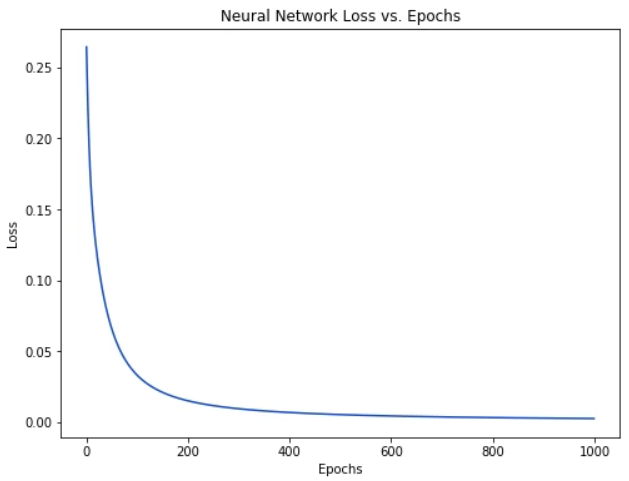

In [23]:
# Make some predictions, after model traning
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily))
print("Frank: %.3f" % network.feedforward(frank))

Emily: 0.964
Frank: 0.055
